## Binary classification using Perceptron

classsify kitten and cat based on grumpy propportion and sleep proportion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'sleep_proportion':[0.2,0.4,0.5,0.7],
                  'grumpy_proportion':[0.1,0.6,0.2,0.9],
                  'prediction':['kitten','kitten','kitten','adult']})
df

,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.1,kitten
1,0.4,0.6,kitten
2,0.5,0.2,kitten
3,0.7,0.9,adult


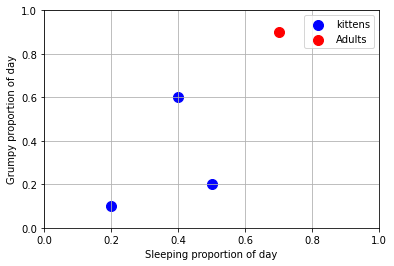

In [3]:
kittens = df[df['prediction']== 'kitten'] # sliced data for plotting
adults = df[df['prediction']=='adult']
#print(kittens)
#print(adults)

plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color = 'b',s=100,label = 'kittens')

plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],color = 'r',s=100,label = 'Adults')

plt.xlabel("Sleeping proportion of day")
plt.ylabel("Grumpy proportion of day")
plt.legend()
plt.axis([0,1,0,1])
plt.grid()

In [4]:
df['bprediction'] = df['prediction'].apply(lambda x: x == 'kitten')
df

,sleep_proportion,grumpy_proportion,prediction,bprediction
0,0.2,0.1,kitten,True
1,0.4,0.6,kitten,True
2,0.5,0.2,kitten,True
3,0.7,0.9,adult,False


In [5]:
df['prediction']

0    kitten
1    kitten
2    kitten
3     adult
Name: prediction, dtype: object

In [6]:
from sklearn.linear_model import Perceptron

classifier = Perceptron(max_iter = 100)

model = classifier.fit(df[['sleep_proportion','grumpy_proportion']],
                           df['bprediction']) #(2dim,1dim)

In [7]:
model.predict([[0.4,0.2]])  #sleepy,grumpy

array([ True])

In [8]:
model.predict([[0.6,0.6]]) 

array([False])

In [9]:
model.predict([[-1,-1]])

array([ True])

In [10]:
model.predict([[0,0],
              [0.2,0],
              [0.4,0],
              [0.6,0],
              [0.8,0],
              [0,0.2],
              [0.2,0.2],
              [0.8,0.8]])

array([ True,  True,  True,  True,  True,  True,  True, False])

In [11]:
model.classes_

array([False,  True])

In [12]:
model.coef_

array([[-0.7, -1. ]])

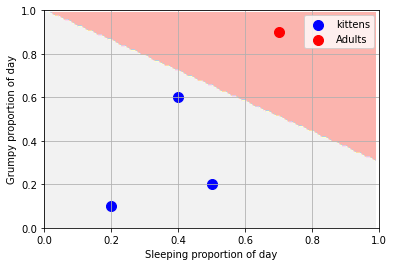

In [13]:
%matplotlib inline
import numpy as np

x_min, x_max = 0, 1 # sleepy range
y_min, y_max = 0, 1 #grumpy range

xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),
                    np.arange(y_min,y_max,0.01))

#print(xx) ; print(yy); # x coord and y coord
xx_lin = xx.ravel() #print(xx_lin);
yy_lin = yy.ravel() #print(yy_lin);

pred_input = np.c_[xx_lin,yy_lin]
#print(pred_input)

z= model.predict(pred_input) #print(z)
z= z.reshape(xx.shape)

#countour plot requires 2 dimen matrix
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color = 'b',s=100,label = 'kittens')

plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],color = 'r',s=100,label = 'Adults')

plt.xlabel("Sleeping proportion of day")
plt.ylabel("Grumpy proportion of day")
plt.legend()
plt.axis([0,1,0,1])
plt.grid()


## suport Vector machine

In [14]:
from sklearn.svm import SVC

SVC_classifier = SVC(C=10,kernel = 'linear')

SVC_model = SVC_classifier.fit(df[['sleep_proportion','grumpy_proportion']],df['bprediction'])

In [15]:
SVC_model .predict([[0.4,0.2]])  #sleepy, grumpy

array([ True])

In [16]:
SVC_model.predict([[0.8,0.8]])

array([False])

In [17]:
SVC_model.predict([[0.4,0.2],
                  [0.8,0.8],
                  [0.6,0.6]])

array([ True, False,  True])

In [18]:
SVC_model.classes_

array([False,  True])

In [19]:
SVC_model.n_support_   #number of support vectors

array([1, 1])

In [20]:
SVC_model.support_vectors_  #support vector values

array([[0.7, 0.9],
       [0.4, 0.6]])

In [21]:
SVC_model.support_   #Index of support vectors in df

array([3, 1])

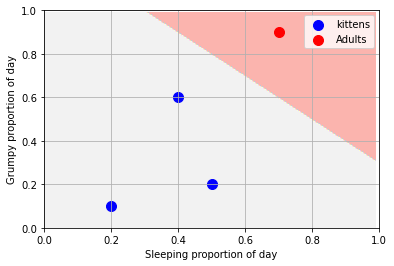

In [22]:
SVC_z = SVC_model.predict(pred_input)
SVC_z = SVC_z.reshape(xx.shape)
#countour plot requires 2 dimen matrix
plt.contourf(xx,yy,SVC_z,cmap=plt.cm.Pastel1)
plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color = 'b',s=100,label = 'kittens')

plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],color = 'r',s=100,label = 'Adults')

plt.xlabel("Sleeping proportion of day")
plt.ylabel("Grumpy proportion of day")
plt.legend()
plt.axis([0,1,0,1])
plt.grid()

